<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/OpenCV_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ready

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

In [2]:
from google.colab import files
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_03.jpg to obama_03.jpg
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [28]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
frame = cv.imread('obama_01.jpeg')
(height, width) = frame.shape[:2]
min_confidence = 0.3

#DNN modeling

In [23]:
model = cv.dnn.readNetFromCaffe(prototxt_name, model_name)
blob = cv.dnn.blobFromImage(cv.resize(frame,(300,300)),1.0,(300,300))
model.setInput(blob)
detections = model.forward()
print(detections)

[[[[0.         1.         0.99952364 ... 0.05585355 0.60740113
    0.33239183]
   [0.         1.         0.14317453 ... 0.3638091  0.9933038
    0.5429359 ]
   [0.         1.         0.12265332 ... 4.0016966  4.8405266
    4.979746  ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


0.99952364 75 14 122 83


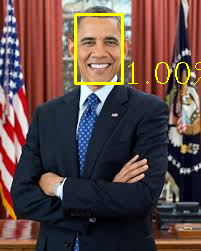

In [29]:
 for i in range(0,detections.shape[2]) :
  confidence = detections[0,0,i,2]
  if confidence > min_confidence :
    box = detections[0,0,i,3:7] * np.array([width, height, width, height])
    (startx, starty, endx, endy) = box.astype('int')
    print(confidence, startx, starty, endx, endy)
    text= '{:.2f}%' .format(confidence)
    cv.rectangle(frame, (startx, starty),(endx,endy), (0,255,255),2)
    cv.putText(frame, text, (endx, endy), cv.FONT_HERSHEY_COMPLEX, 1,(0,255,255))
cv_imshow(frame)